In [1]:
import pandas as pd 
import numpy as np 
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression
from sklearn import preprocessing

In [2]:
df = pd.read_csv("WineQT.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [7]:
y = df["quality"]
X = df.loc[:, df.columns!='quality']

In [8]:
X = X.drop("Id", axis = 1)

In [9]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [10]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
def make_mi_scores(X, y):
    mi_scores = mutual_info_regression(X, y, discrete_features=False)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X_train, y_train)

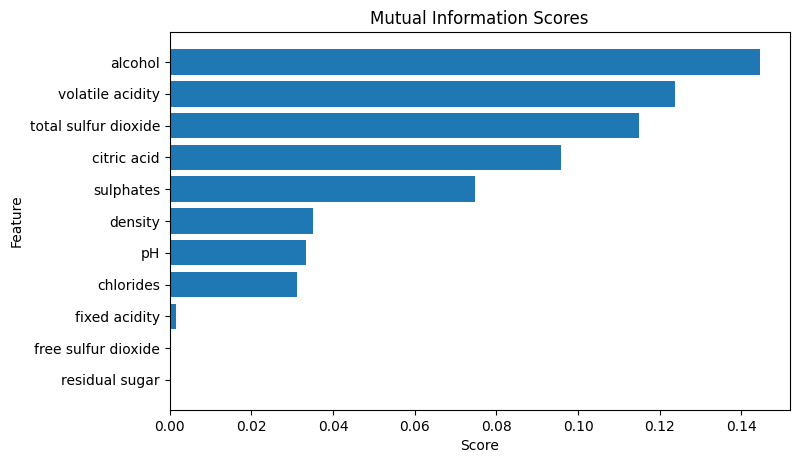

In [13]:
def plot_utility_scores(scores):
    y = scores.sort_values(ascending=True)
    width = np.arange(len(y))
    ticks = list(y.index)
    plt.barh(width, y)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plt.xlabel("Score")
plt.ylabel("Feature")
plot_utility_scores(mi_scores)

In [14]:
#drop_cols = ["free sulfur dioxide","residual sugar","pH","fixed acidity","density"]
drop_cols = ["free sulfur dioxide","residual sugar","pH","volatile acidity","density","total sulfur dioxide","chlorides"]
X_train = X_train.drop(drop_cols,axis=1)
X_test = X_test.drop(drop_cols,axis=1)

In [15]:
X_train.columns, X_test.columns

(Index(['fixed acidity', 'citric acid', 'sulphates', 'alcohol'], dtype='object'),
 Index(['fixed acidity', 'citric acid', 'sulphates', 'alcohol'], dtype='object'))

In [16]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train =  min_max_scaler.fit_transform(X_train)

In [17]:
X_test = min_max_scaler.transform(X_test)

In [18]:
print(f'Training data:\n{X_train[0:5]}\nTest data:\n{X_test[0:5]}')

Training data:
[[0.35454545 0.56       0.25149701 0.375     ]
 [0.48181818 0.56       0.23952096 0.53571429]
 [0.39090909 0.36       0.21556886 0.60714286]
 [0.18181818 0.04       0.13772455 0.26785714]
 [0.27272727 0.25       0.14371257 0.125     ]]
Test data:
[[0.2        0.04       0.16167665 0.19642857]
 [0.20909091 0.21       0.23353293 0.14880952]
 [0.21818182 0.12       0.08982036 0.375     ]
 [0.29090909 0.68       0.43712575 0.125     ]
 [0.71818182 0.49       0.24550898 0.625     ]]


In [19]:
y_train = y_train.astype('float32').to_numpy().astype(np.float32)
y_test = y_test.astype('float32').to_numpy().astype(np.float32)

In [20]:
def data_iter(batch_size, features, targets):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = np.array(indices[i:min(i+batch_size,num_examples)])
        yield features[batch_indices],targets[batch_indices]

In [21]:
batch_size = 10
for X, y in data_iter(batch_size, X_train, y_train):
    print(X,'\n',X.shape[0], '\n', y)
    break

[[0.41818182 0.24       0.20359281 0.21428571]
 [0.33636364 0.39       0.26347305 0.73214286]
 [0.23636364 0.31       0.25748503 0.51785714]
 [0.19090909 0.02       0.29341317 0.44642857]
 [0.22727273 0.06       0.08982036 0.25      ]
 [0.28181818 0.12       0.09580838 0.17857143]
 [0.40909091 0.24       0.32335329 0.33928571]
 [0.29090909 0.01       0.17365269 0.42857143]
 [0.32727273 0.24       0.18562874 0.19642857]
 [0.28181818 0.21       0.1257485  0.25      ]] 
 10 
 [5. 7. 8. 6. 5. 5. 6. 5. 6. 6.]


In [22]:
def linear_regression(X, w, b): #@save
    """The linear regression model."""
    return np.dot(X, w) + b

In [23]:
def initialize_params():
    w = np.random.normal(0, 0.1, size=(X_train.shape[1], 1)).astype(np.float32)
    b = np.zeros(1).astype(np.float32)
    return w,b

In [24]:
def mean_squared_loss(y_hat, y): #@save
    """Squared loss."""
    return ((1/2)*(y_hat - y.reshape(y_hat.shape))**2).mean()

In [25]:
def mbgd(X, params, batch_size, lr=0.005): #@save
    y_hat = linear_regression(X, w, b)
    error = (y_hat - y.reshape(y_hat.shape))
    w_derivative = (np.dot(X.T,error)).sum()
    params[0] = params[0] - ((lr/batch_size)*w_derivative)
    params[1] = params[1] - ((lr/batch_size)*error.sum())
    return params[0],params[1]

In [26]:
lr = 0.01
num_epochs = 20
batch_size = 10

In [27]:
w,b =  initialize_params()
epoch_list = []
cost_list = []
loss_array = np.empty((0, 2), np.float32)
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, X_train, y_train):
             w,b = mbgd(X, [w,b], X.shape[0], lr)
    train_cost = mean_squared_loss(linear_regression(X_train, w, b), y_train)
    epoch_list.append(epoch+1)
    cost_list.append(train_cost)
    print(f'learning rate = {lr}, epoch = {epoch + 1}, training cost = {float(train_cost):f}')

learning rate = 0.01, epoch = 1, training cost = 0.727126
learning rate = 0.01, epoch = 2, training cost = 0.536599
learning rate = 0.01, epoch = 3, training cost = 0.503439
learning rate = 0.01, epoch = 4, training cost = 0.475304
learning rate = 0.01, epoch = 5, training cost = 0.450430
learning rate = 0.01, epoch = 6, training cost = 0.428685
learning rate = 0.01, epoch = 7, training cost = 0.409465
learning rate = 0.01, epoch = 8, training cost = 0.392640
learning rate = 0.01, epoch = 9, training cost = 0.377905
learning rate = 0.01, epoch = 10, training cost = 0.365436
learning rate = 0.01, epoch = 11, training cost = 0.354629
learning rate = 0.01, epoch = 12, training cost = 0.343851
learning rate = 0.01, epoch = 13, training cost = 0.335051
learning rate = 0.01, epoch = 14, training cost = 0.327381
learning rate = 0.01, epoch = 15, training cost = 0.321050
learning rate = 0.01, epoch = 16, training cost = 0.314710
learning rate = 0.01, epoch = 17, training cost = 0.309647
learni

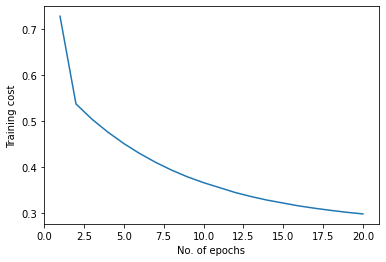

In [28]:
plt.plot(epoch_list,cost_list)
plt.xlabel("No. of epochs")
plt.ylabel("Training cost")
plt.xlim(0,21)
plt.show()

In [29]:
y_test_pred = linear_regression(X_test,w,b)
y_train_pred = linear_regression(X_train,w,b)
test_MSE  = mean_squared_loss(y_test_pred,y_test).mean()
train_MSE = mean_squared_loss(y_train_pred,y_train).mean()
print(f'Test error is {test_MSE}\nTrain error is {train_MSE}')

Test error is 0.23663315601517987
Train error is 0.2974299289073157
